In [13]:
from Func_Col import *
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import MultipleLocator, FuncFormatter

In [5]:
def findcolor(list,color1, color2):
    color = []
    for is_true in list:
        if is_true:
            color.append(color1)
        else:
            color.append(color2)
    return color

In [6]:
def frac(x,pos):
    num = int(x*15)
    return fr"$\frac{{{num}}}{{15}}$" if num > 0 else "0"

In [28]:
val,PPT = [],[]
for n in np.linspace(0, 1/3 , 1000):
    val.append(realign_log(rhob(n,generate_bell_states())))
    PPT.append(is_PPT(rhob(n,generate_bell_states())))

In [8]:
e = [[1,0,0],
     [0,1,0],
     [1,1,1],
     [1,1,0],
     [1,0,1],
     [0,1,1]]


In [9]:
momentum1 = [2,np.sqrt(3),0,0]
momentum2 = [2,-np.sqrt(3),0,0]
xi05 = 0.5
xi08 = 0.8
xi1 = 1

In [11]:
val_05,val_08,val_1,PPT05,PPT08,PPT1 = [],[],[],[],[],[]

for dir in e:
    v = realign_val_12_21(dir,xi05,momentum1,momentum2)[0]
    val_05.append(v)
    v = realign_val_12_21(dir,xi08,momentum1,momentum2)[0]
    val_08.append(v)
    v = realign_val_12_21(dir,xi1,momentum1,momentum2)[0]
    val_1.append(v)
    PPT05.append(realign_val_12_21(dir,xi05,momentum1,momentum2)[1])
    PPT08.append(realign_val_12_21(dir,xi08,momentum1,momentum2)[1])
    PPT1.append(realign_val_12_21(dir,xi1,momentum1,momentum2)[1])

In [23]:
np.shape(PPT05)

(6, 1000)

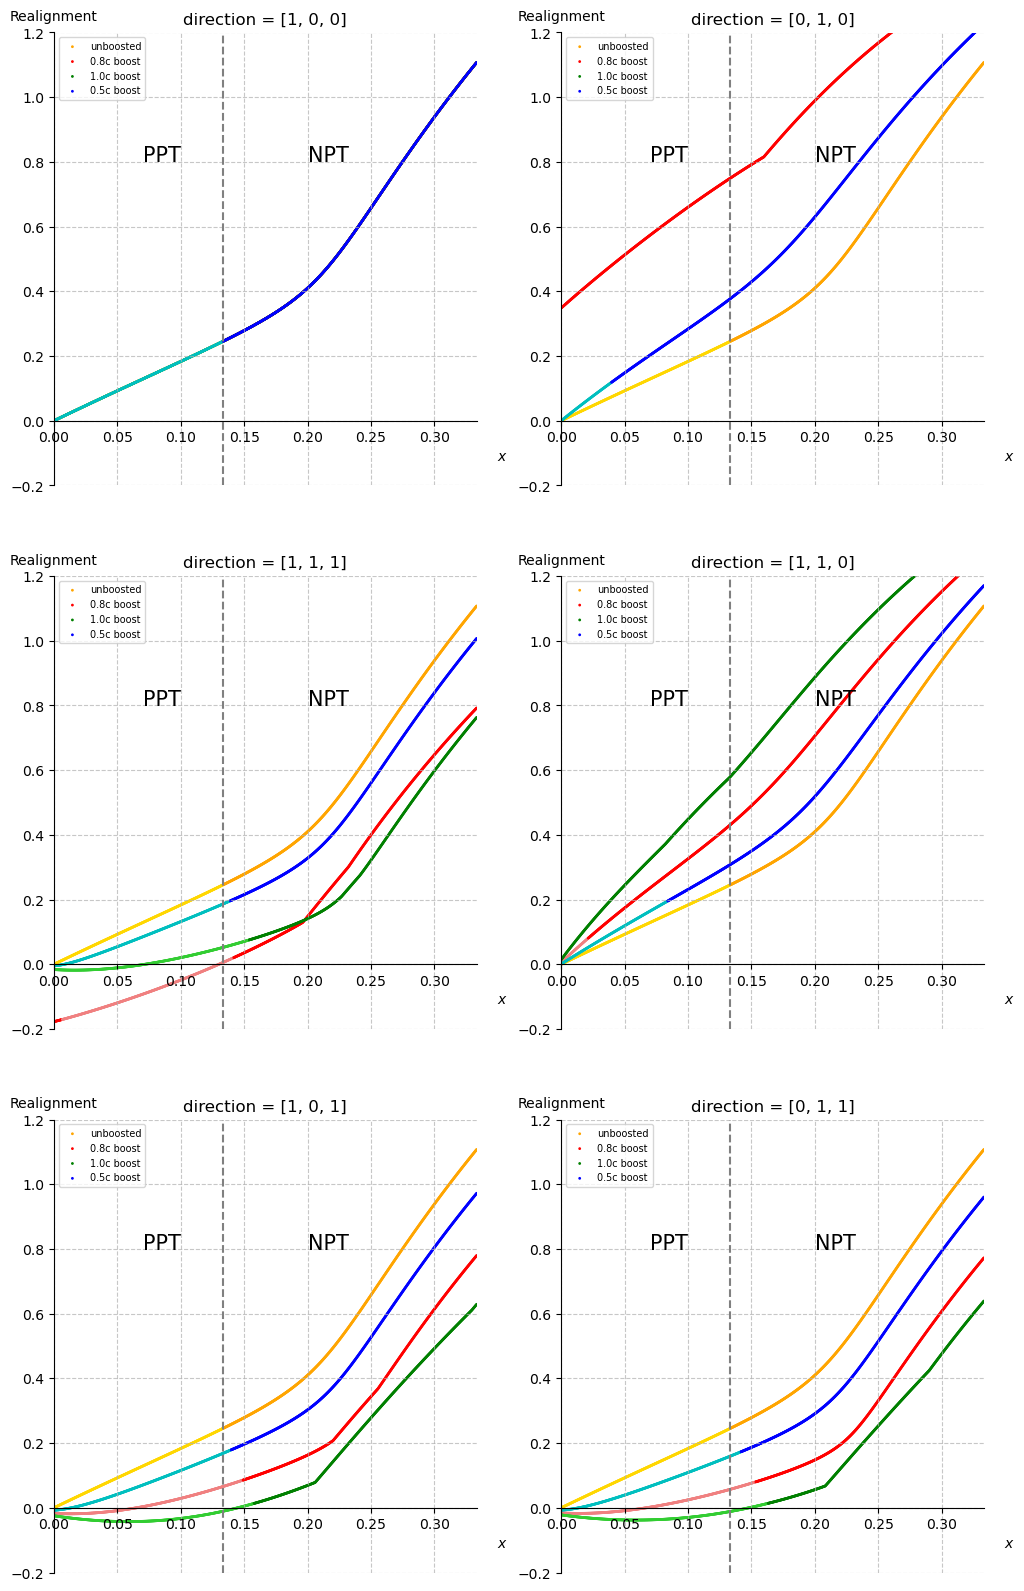

In [29]:
fig, axes = plt.subplots(3,2,figsize=(12,20))

axes = axes.flatten()

for i in range(len(e)):
       ax = axes[i]
       ax.set_xlim(0,1/3)
       ax.set_ylim(-0.2,1.2)
       ax.scatter(np.linspace(0,1/3,1000), val, color = findcolor(PPT,'gold','orange'), label = "unboosted",s=1)
       ax.scatter(np.linspace(0,1/3,1000), val_08[i], color = findcolor(PPT08[i],'lightcoral','r'), label="0.8c boost",s=1)
       ax.scatter(np.linspace(0,1/3,1000), val_1[i], color = findcolor(PPT1[i],'limegreen','g'),label="1.0c boost",s=1)
       ax.scatter(np.linspace(0,1/3,1000), val_05[i], color = findcolor(PPT05[i],'c','b'),label="0.5c boost",s=1)
       ax.axvline(2/15, linestyle = "--", color = "grey")
       ax.grid(True, linestyle='--', alpha=0.7)
       ax.legend(fontsize=7)
       ax.spines["bottom"].set_position(("data",0))
       ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
       ax.set(title = f"direction = {e[i]}",
                 xlabel=r"$x$")
       ax.set_ylabel("Realignment",rotation = 0)
       ax.xaxis.set_label_coords(1.06,0.08)
       ax.yaxis.set_label_coords(0,1.02)
       ax.text(0.07,0.8,"PPT",fontsize = 15)
       ax.text(0.2,0.8,"NPT",fontsize = 15)
       ax.spines["top"].set_visible(False)
       ax.spines["right"].set_visible(False)
fig.savefig('Realignment6direction')
       #ax.xaxis.set_major_locator(MultipleLocator(1/15))
       #ax.xaxis.set_major_formatter(FuncFormatter(frac))

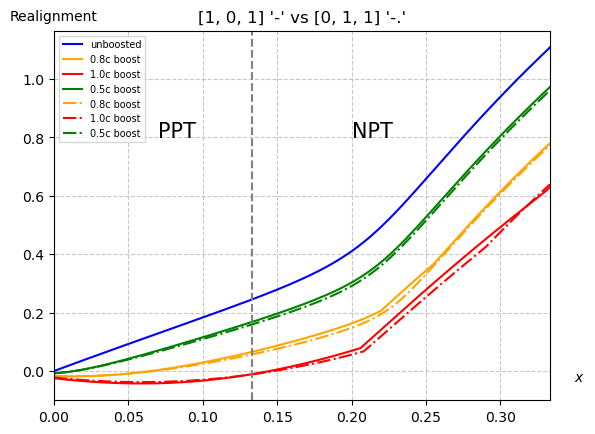

In [ ]:
fig,ax = plt.subplots()
ax.plot(np.linspace(0,1/3,1000), val, color = "blue", label = "unboosted")
ax.plot(np.linspace(0,1/3,1000), val_08[4], color = "orange", label="0.8c boost")
ax.plot(np.linspace(0,1/3,1000), val_1[4], color = "red",label="1.0c boost")
ax.plot(np.linspace(0,1/3,1000), val_05[4], color = "green",label="0.5c boost")
ax.plot(np.linspace(0,1/3,1000), val_08[5], color = "orange", label="0.8c boost",linestyle="-.")
ax.plot(np.linspace(0,1/3,1000), val_1[5], color = "red",label="1.0c boost",linestyle="-.")
ax.plot(np.linspace(0,1/3,1000), val_05[5], color = "green",label="0.5c boost",linestyle="-.")
ax.axvline(2/15, linestyle = "--", color = "grey")
ax.grid(True, linestyle='--', alpha=0.7)
ax.legend(fontsize=7)
#ax.spines["bottom"].set_position(("data",0))
ax.set_xlim(0,max(np.linspace(0,1/3,1000)))
ax.set(title = f"{e[4]} '-' vs {e[5]} '-.'",
          xlabel=r"$x$")
ax.set_ylabel("Realignment",rotation = 0)
ax.xaxis.set_label_coords(1.06,0.08)
ax.yaxis.set_label_coords(0,1.02)
ax.text(0.07,0.8,"PPT",fontsize = 15)
ax.text(0.2,0.8,"NPT",fontsize = 15)

fig.savefig('101vs011')
#ax.spines["top"].set_visible(False)
#ax.spines["right"].set_visible(False)

In [ ]:
b = boosted_state1(e[0],4/5,momentum1,momentum2,1/15)

In [ ]:
mpt = parttran(b)
eig1 = la.eigh(b)[1]
eig2 = la.eigh(mpt)[1]

In [ ]:
np.linspace(0,1,201)

array([0.   , 0.005, 0.01 , 0.015, 0.02 , 0.025, 0.03 , 0.035, 0.04 ,
       0.045, 0.05 , 0.055, 0.06 , 0.065, 0.07 , 0.075, 0.08 , 0.085,
       0.09 , 0.095, 0.1  , 0.105, 0.11 , 0.115, 0.12 , 0.125, 0.13 ,
       0.135, 0.14 , 0.145, 0.15 , 0.155, 0.16 , 0.165, 0.17 , 0.175,
       0.18 , 0.185, 0.19 , 0.195, 0.2  , 0.205, 0.21 , 0.215, 0.22 ,
       0.225, 0.23 , 0.235, 0.24 , 0.245, 0.25 , 0.255, 0.26 , 0.265,
       0.27 , 0.275, 0.28 , 0.285, 0.29 , 0.295, 0.3  , 0.305, 0.31 ,
       0.315, 0.32 , 0.325, 0.33 , 0.335, 0.34 , 0.345, 0.35 , 0.355,
       0.36 , 0.365, 0.37 , 0.375, 0.38 , 0.385, 0.39 , 0.395, 0.4  ,
       0.405, 0.41 , 0.415, 0.42 , 0.425, 0.43 , 0.435, 0.44 , 0.445,
       0.45 , 0.455, 0.46 , 0.465, 0.47 , 0.475, 0.48 , 0.485, 0.49 ,
       0.495, 0.5  , 0.505, 0.51 , 0.515, 0.52 , 0.525, 0.53 , 0.535,
       0.54 , 0.545, 0.55 , 0.555, 0.56 , 0.565, 0.57 , 0.575, 0.58 ,
       0.585, 0.59 , 0.595, 0.6  , 0.605, 0.61 , 0.615, 0.62 , 0.625,
       0.63 , 0.635,